datapoints: 423 testing time: 38.29560000000001
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.]
[16 43 38 51 39 51 42 38 42 43 20]


/Applications/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


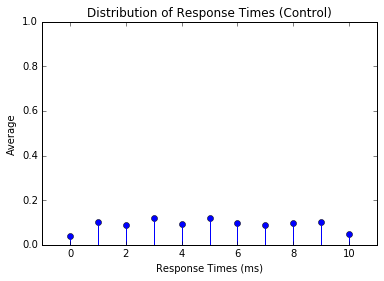

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import csv

data = []
with open("control_data.csv") as cdata:
    for row in csv.reader(cdata, delimiter=','):
        data += [float(d) for d in row]

# Building Histogram

bins = np.linspace(0.0, 11.0, 12)

cnt = len(data)
print("datapoints:", cnt, "testing time:", (cnt*5.432)/60)
dhist, dbins = np.histogram(data, bins=bins)
print(dbins)
print(dhist)

dhist = [d/cnt for d in dhist]

fig, ax = plt.subplots(figsize=(6, 4))
ax.stem(dbins[:-1], dhist, 'b', markerfmt='bo')
ax.set_title("Distribution of Response Times (Control)")
ax.set_xlabel("Response Times (ms)")
ax.set_xlim(left=-1, right=11)
ax.set_ylabel("Average")
ax.set_ylim(bottom=0, top=1)
fig.show()

/Applications/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


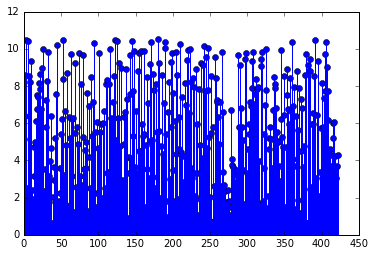

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.stem(data)
fig.show()